In [10]:
from player import Player

In [11]:
import socceraction.spadl as spadl
import socceraction.xthreat as xthreat
import soccerdata as sd
from pathlib import PosixPath
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

import socceraction.spadl.config as spadlconfig
from socceraction.spadl.schema import SPADLSchema
from pandera.typing import DataFrame, Series
import numpy.typing as npt
from sklearn.exceptions import NotFittedError
from typing import Callable, List, Optional, Tuple
import os
from datetime import date, timedelta
from ipywidgets import interact

In [12]:
def string_to_date(input):
    input_parts = input.split('-')
    return date(int(input_parts[0]), int(input_parts[1]), int(input_parts[2]))	

def get_time_list(start):
    date_list = []
    start_date = string_to_date(start)
    end_date = date.today()
    delta = timedelta(days=1)
    while start_date <= end_date:
        date_list.append(start_date.strftime("%Y-%m-%d"))
        start_date += delta
    return date_list

In [48]:
def get_df():
    return pd.read_csv("../data/data_0.2/player_db.csv", sep=";")

def draw_plot(id):
    # id to id
    df = get_df()
    id = df[df["player_name"] == id]['id'].values[0]
    proto_player = Player().parse(open(f"./../data/data_0.2/{str(id)}.pb", "rb").read())
    df_player = pd.DataFrame(proto_player.expected_game_impact)
    df_player = df_player.sort_values("game_date").reset_index(drop=True)
    attack, attack2, shots = [], [], []
    for idx, x in df_player.iterrows():
        if idx < 4:
            continue
        attack.append(df_player["xg"][idx-5:idx].mean())
        attack2.append(df_player["xt_all"][idx-5:idx].mean())
        shots.append(df_player["xt_only_pos"][idx-5:idx].mean())

    plt.plot(np.arange(len(attack)), attack, '.g')
    plt.plot(np.arange(len(attack2)), attack2, '.r')
    plt.plot(np.arange(len(shots)), shots, '.y')
df = get_df()
interact(draw_plot, id=df['player_name'].sort_values())

interactive(children=(Dropdown(description='id', options=('Aaron Hunt', 'Aaron Opoku', 'Aaron Seydel', 'Abdene…

<function __main__.draw_plot(id)>

In [49]:
proto_player = Player().parse(open(f"./../data/data_0.2/{str(115509)}.pb", "rb").read())
df_ducksch = pd.DataFrame(proto_player.expected_game_impact)

In [50]:
df_ducksch = df_ducksch.sort_values("game_date", ascending=True).reset_index(drop=True)

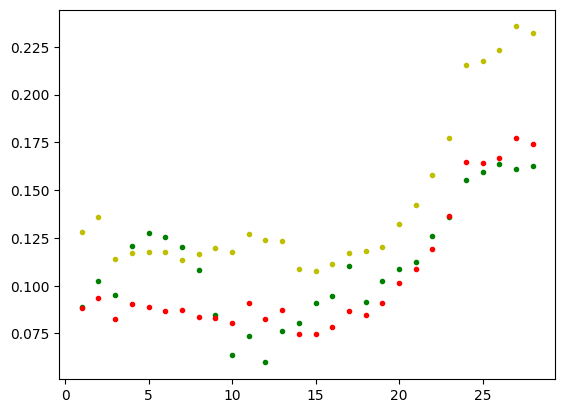

In [57]:
df_home = df_ducksch.loc[df_ducksch["home"]]
df_home.reset_index(drop=True, inplace=True)
attack, attack2, shots = [], [], []
for idx, x in df_home.iterrows():
    if idx < 4:
        continue
    attack.append(df_home["xg"][idx-5:idx].mean())
    attack2.append(df_home["xt_all"][idx-5:idx].mean())
    shots.append(df_home["xt_only_pos"][idx-5:idx].mean())

plt.plot(np.arange(len(attack)), attack, '.g')
plt.plot(np.arange(len(attack2)), attack2, '.r')
plt.plot(np.arange(len(shots)), shots, '.y')

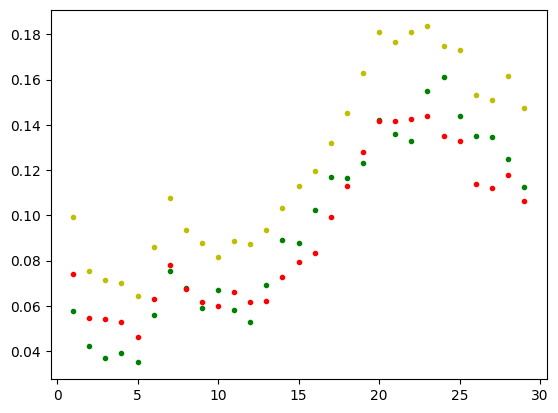

In [58]:
df_away = df_ducksch.loc[df_ducksch["home"] == False]
df_away.reset_index(drop=True, inplace=True)
attack, attack2, shots = [], [], []
for idx, x in df_away.iterrows():
    if idx < 4:
        continue
    attack.append(df_away["xg"][idx-5:idx].mean())
    attack2.append(df_away["xt_all"][idx-5:idx].mean())
    shots.append(df_away["xt_only_pos"][idx-5:idx].mean())

plt.plot(np.arange(len(attack)), attack, '.g')
plt.plot(np.arange(len(attack2)), attack2, '.r')
plt.plot(np.arange(len(shots)), shots, '.y')

In [59]:
# gi

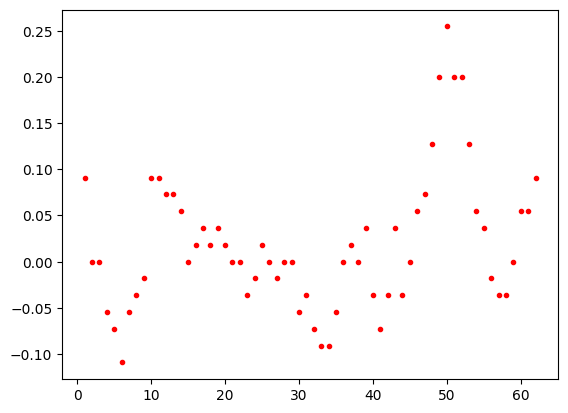

In [62]:
gi = []
for idx, x in df_ducksch.iterrows():
    if idx < 4:
        continue
    gi.append(df_ducksch["gi"][idx-5:idx].mean())
plt.plot(gi, ".r")

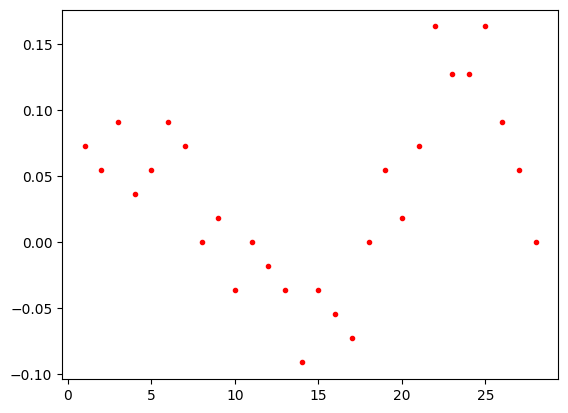

In [61]:
gi = []
for idx, x in df_home.iterrows():
    if idx < 4:
        continue
    gi.append(df_home["gi"][idx-5:idx].mean())
plt.plot(gi, ".r")

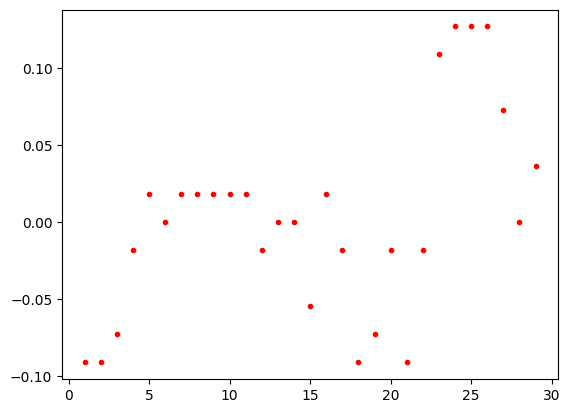

In [60]:
gi = []
for idx, x in df_away.iterrows():
    if idx < 4:
        continue
    gi.append(df_away["gi"][idx-5:idx].mean())
plt.plot(gi, ".r")